# Decision Tree

In [17]:
# Importação de Bibliotecas
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold


In [ ]:

train_df = pd.read_csv('train.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)
test_df = pd.read_csv('test.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)



In [ ]:

print(train_df.head())
print(train_df.info())
print(train_df.describe())


       ID Customer_ID  Month           Name   Age          SSN Occupation  \
0  0x1604   CUS_0xd40  March  Aaron Maashoh  -500  821-00-0265  Scientist   
1  0x1605   CUS_0xd40  April  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1606   CUS_0xd40    May  Aaron Maashoh    23  821-00-0265  Scientist   
3  0x1607   CUS_0xd40   June  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1608   CUS_0xd40   July  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12                    NaN                  3  ...        Good   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12            1824.843333                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age 

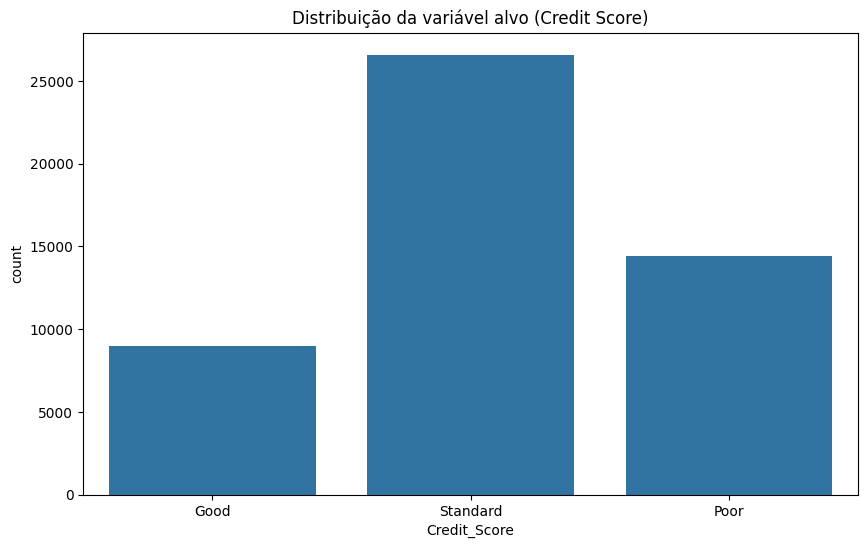

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=train_df)
plt.title('Distribuição da variável alvo (Credit Score)')
plt.show()

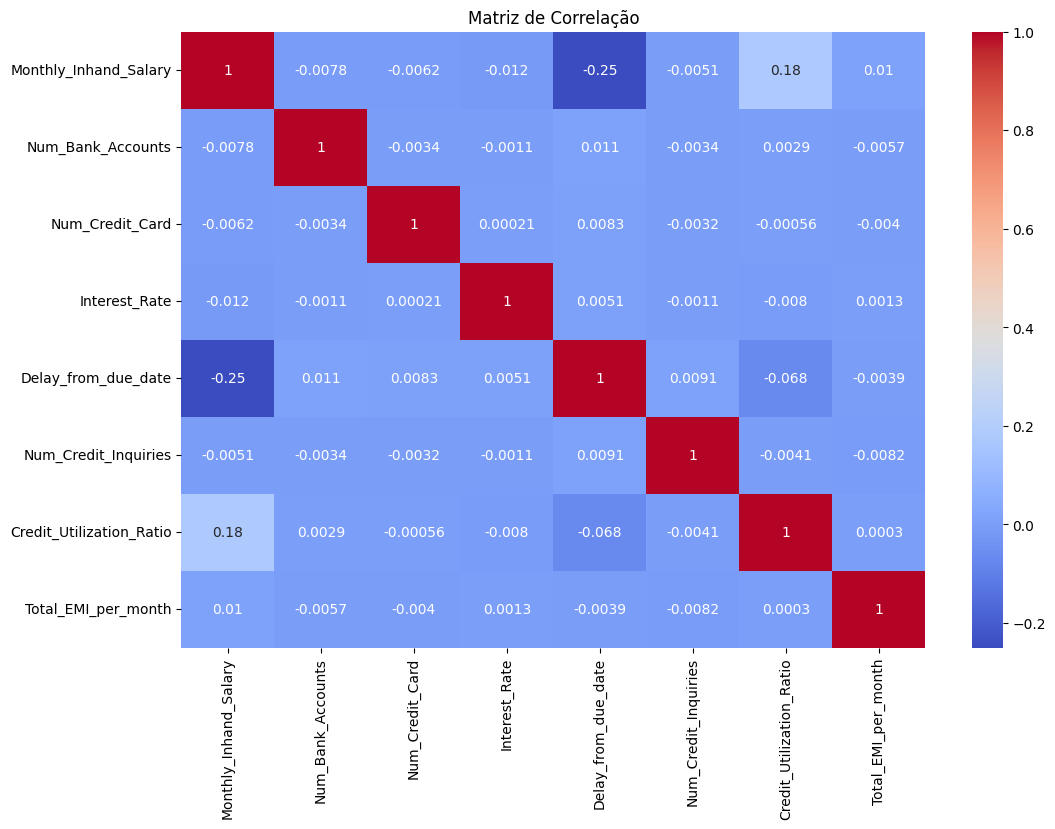

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Pré-processamento


In [ ]:

train_df.fillna(train_df.mean(numeric_only=True), inplace=True)
test_df.fillna(test_df.mean(numeric_only=True), inplace=True)


categorical_features = train_df.select_dtypes(include=['object']).columns


In [ ]:


categorical_features = [col for col in categorical_features if col != 'Credit_Score']

train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True, dtype='uint8')
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True, dtype='uint8')

print(train_df.shape)
print(test_df.shape)
print(train_df.memory_usage(deep=True).sum() / (1024 ** 2), "MB")


test_df



(49985, 220608)
(25048, 140878)
10521.88455581665 MB


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,ID_0x10001,ID_0x10017,...,Monthly_Balance_996.6595312916323,Monthly_Balance_997.1329182034951,Monthly_Balance_997.4209671289549,Monthly_Balance_997.5161927352407,Monthly_Balance_997.7866244094217,Monthly_Balance_997.8304542267027,Monthly_Balance_998.8284066442258,Monthly_Balance_999.7432180445578,Monthly_Balance_999.7498074985788,Monthly_Balance___-333333333333333333333333333__
0,1824.843333,3,4,3,3,2022.0,35.030402,49.574949,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1824.843333,3,4,3,3,4.0,33.053114,49.574949,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3037.986667,2,4,6,3,5.0,30.996424,18.816215,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4177.388628,1,5,8,8,3.0,35.229707,246.992319,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12187.220000,1,5,8,6,3.0,35.685836,246.992319,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25043,1929.906667,10,8,29,33,12.0,34.780553,60.964772,0,0,...,0,0,0,0,0,0,0,0,0,0
25044,4177.388628,4,6,7,20,7.0,27.758522,35.104023,0,0,...,0,0,0,0,0,0,0,0,0,0
25045,3359.415833,4,6,7,23,7.0,36.858542,35.104023,0,0,...,0,0,0,0,0,0,0,0,0,0
25046,4177.388628,4,6,7,21,7.0,39.139840,35.104023,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

X = train_df.drop('Credit_Score', axis=1)
y = train_df['Credit_Score']

In [ ]:

top_columns = X.std().sort_values(ascending=False).head(300).index
X_reduced = X[top_columns]

X_sample = X_reduced.sample(frac=0.2, random_state=42)
y_sample = y.loc[X_sample.index]

In [ ]:
# Dividir os dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


In [ ]:
# Treinamento do modelo
model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=100, random_state=42)

In [ ]:

predictions = model.predict(X_val)
print(f'Acurácia: {accuracy_score(y_val, predictions):.2f}')
print('Relatório de Classificação:')
print(classification_report(y_val, predictions))


Acurácia: 0.56
Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.32      0.29      0.30        62
        Poor       0.56      0.52      0.54       114
    Standard       0.63      0.66      0.65       226

    accuracy                           0.56       402
   macro avg       0.50      0.49      0.49       402
weighted avg       0.56      0.56      0.56       402



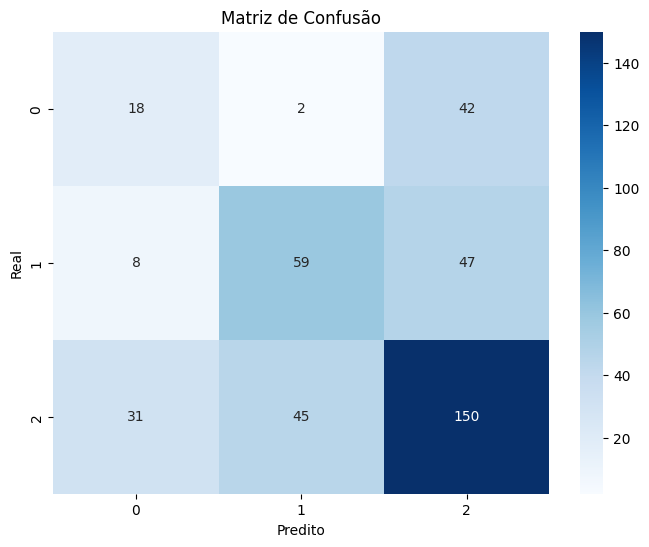

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()